In [1]:
import pandas as pd 
from scipy import stats
import numpy as np

#open dataset
df0 = pd.read_csv("20220105_company_emissions_data.csv", sep=',')

#drop irrelevant columns from dataset
df1 = df0.drop(columns=['WorkforceDataPoints.AsianMinoritiesEmployeesPercent',
                       'WorkforceDataPoints.AsianMinoritiesManagersPercent', 
                      'WorkforceDataPoints.AverageEmployeeLengthOfService',
                      'WorkforceDataPoints.AverageTrainingHours', 
                      'WorkforceDataPoints.BbbeeLevel', 
                      'WorkforceDataPoints.BlackOrAfricanAmericanMinoritiesEmployeesPercent',
                      'WorkforceDataPoints.BlackOrAfricanAmericanMinoritiesManagersPercent',
                      'WorkforceDataPoints.ContractorAccidents',
                      'WorkforceDataPoints.ContractorFatalities',
                      'WorkforceDataPoints.ContractorLostWorkingDays',
                      'WorkforceDataPoints.DayCareServices',
                      'WorkforceDataPoints.DiversityAndOpportunityControversies',
                      'WorkforceDataPoints.EmployeeAccidents',
                      'WorkforceDataPoints.EmployeeFatalities',
                      'WorkforceDataPoints.EmployeeHealthAndSafetyTrainingHours',
                      'WorkforceDataPoints.EmployeeLostWorkingDays',
                      'WorkforceDataPoints.EmployeeResourceGroups',
                      'WorkforceDataPoints.EmployeeSatisfaction',
                      'WorkforceDataPoints.EmployeesHealthAndSafetyControversies',
                      'WorkforceDataPoints.EmployeesHealthAndSafetyOhsas18001',
                      'WorkforceDataPoints.EmployeesHealthAndSafetyTeam',
                      'WorkforceDataPoints.EmployeesWithDisabilities',
                      'WorkforceDataPoints.FlexibleWorkingHours',
                      'WorkforceDataPoints.GenderPayGapPercentage',
                      'WorkforceDataPoints.HealthAndSafetyTraining',
                      'WorkforceDataPoints.HispanicOrLatinoMinoritiesEmployeesPercent',
                      'WorkforceDataPoints.HispanicOrLatinoMinoritiesManagersPercent',
                      'WorkforceDataPoints.HivAidsProgram',
                      'WorkforceDataPoints.HrcCorporateEqualityIndex',
                      'WorkforceDataPoints.HsmsCertifiedPercentage',
                      'WorkforceDataPoints.InternalPromotion',
                      'WorkforceDataPoints.InvoluntaryTurnoverOfEmployees',
                      'WorkforceDataPoints.LostTimeInjuryRateContractors',
                      'WorkforceDataPoints.LostTimeInjuryRateEmployees',
                      'WorkforceDataPoints.LostTimeInjuryRateTotal',
                      'WorkforceDataPoints.LostWorkingDays',
                      'WorkforceDataPoints.ManagementDepartures',
                      'WorkforceDataPoints.ManagementTraining',
                      'WorkforceDataPoints.MinoritiesEmployeesPercent',
                      'WorkforceDataPoints.MinoritiesManagersPercent',
                      'WorkforceDataPoints.MinoritiesSalaryGapPercent',
                      'WorkforceDataPoints.NewWomenEmployees',
                      'WorkforceDataPoints.NumberOfEmployeesFromCsrReporting',
                      'WorkforceDataPoints.OccupationalDiseases',
                      'WorkforceDataPoints.OtherMinoritiesEmployeesPercent',
                      'WorkforceDataPoints.OtherMinoritiesManagersPercent',
                      'WorkforceDataPoints.PolicyCareerDevelopment',
                      'WorkforceDataPoints.PolicyDiversityAndOpportunity',
                      'WorkforceDataPoints.PolicyEmployeeHealthAndSafety',
                      'WorkforceDataPoints.PolicySkillsTraining',
                      'WorkforceDataPoints.PolicySupplyChainHealthAndSafety',
                      'WorkforceDataPoints.RecentDiversityOpportunityControversies',
                      'WorkforceDataPoints.RecentEmployeeHealthAndSafetyControversies',
                      'WorkforceDataPoints.RecentWagesWorkingConditionControversies',
                      'WorkforceDataPoints.SalariesAndWagesFromCsrReporting',
                      'WorkforceDataPoints.Strikes',
                      'WorkforceDataPoints.SupplierESGTraining',
                      'WorkforceDataPoints.SupplyChainHealthAndSafetyImprovements',
                      'WorkforceDataPoints.SupplyChainHealthAndSafetyTraining',
                      'WorkforceDataPoints.TargetsDiversityAndOpportunity',
                      'WorkforceDataPoints.TotalInjuryRateContractors',
                      'WorkforceDataPoints.TotalInjuryRateEmployees',
                      'WorkforceDataPoints.TotalInjuryRateTotal',
                      'WorkforceDataPoints.TradeUnionRepresentation',
                      'WorkforceDataPoints.TrainingCostsTotal',
                      'WorkforceDataPoints.TrainingHoursTotal',
                      'WorkforceDataPoints.TurnoverOfEmployees',
                      'WorkforceDataPoints.VoluntaryTurnoverOfEmployees',
                      'WorkforceDataPoints.WagesWorkingConditionControversiesCount',
                      'WorkforceDataPoints.WhiteMinoritiesEmployeesPercent',
                      'WorkforceDataPoints.WhiteMinoritiesManagersPercent',
                      'WorkforceDataPoints.WomenEmployees',
                      'WorkforceDataPoints.WomenManagers',
                      'WorkforceIndicators.AnnouncedLayOffsToTotalEmployees',
                      'WorkforceIndicators.HealthAndSafetyPolicy',
                      'WorkforceIndicators.InjuriesToMillionHours',
                      'WorkforceIndicators.LostDaysToTotalDays',
                      'WorkforceIndicators.NetEmploymentCreation',
                      'WorkforceIndicators.SalaryGap',
                      'WorkforceIndicators.TrainingAndDevelopmentPolicy',
                      'WorkforceIndicators.TrainingCostsPerEmployee',
                      'WorkforceIndicators.WagesWorkingConditionControversies'],
                      axis=1)
    
#number of columns in (cleaned) dataset
len(df0.columns)
len(df1.columns)

#df1.sort_values(['GTAP sector'], ascending=[True], inplace=True)
display(df1)

#save cleaned dataset as new file
df = df1.to_csv('company_emissions_cleaned.csv', index=True)

,organization_id,StatementDetails.FinancialPeriodEndDate,StatementDetails.FinancialPeriodFiscalYear,StatementDetails.FinancialPeriodIsIncomplete,StatementDetails.EsgOrAtdIndicator,EmissionDataPoints.AccidentalSpills,EmissionDataPoints.AnalyticCO2EstimationMethod,EmissionDataPoints.AnalyticEstimatesCO2EquivalentsEmissionTotal,EmissionDataPoints.BiodiversityImpactReduction,EmissionDataPoints.CarbonOffsetsCredits,...,ResourceUseDataPoints.TargetsEnergyEfficiency,ResourceUseDataPoints.TargetsWaterEfficiency,ResourceUseDataPoints.TotalRenewableEnergy,ResourceUseDataPoints.ToxicChemicalsReduction,ResourceUseDataPoints.WaterRecycled,ResourceUseDataPoints.WaterWithdrawalTotal,WorkforceDataPoints.AccidentsTotal,WorkforceDataPoints.AnnouncedLayOffs,GTAP country,GTAP sector
0,2352,2006-12-31T00:00:00.000Z,2006,False,ESG,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,Ireland,Null
1,10113,2018-12-31T00:00:00.000Z,2018,False,ESG,NaN,Median,285.0,0.0,NaN,...,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,United States of America,Null
2,6230,2011-12-31T00:00:00.000Z,2011,False,ESG,NaN,Reported,129206.0,1.0,NaN,...,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,United States of America,Forestry
3,6360,2012-12-31T00:00:00.000Z,2012,True,ATD,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,Transport nec
4,841,2006-12-31T00:00:00.000Z,2006,False,ESG,0.076,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,0.0,NaN,523000000.0,107.0,NaN,Canada,Electricity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101101,8473,2017-12-31T00:00:00.000Z,2017,True,ATD,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,Insurance
101102,2907,2010-03-31T00:00:00.000Z,2010,False,ESG,NaN,Reported,18764182.0,1.0,NaN,...,1.0,1.0,NaN,0.0,NaN,739071.0,NaN,NaN,Japan,Water transport
101103,12417,2014-12-31T00:00:00.000Z,2014,True,ATD,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,Financial services nec
101104,479,2009-06-30T00:00:00.000Z,2009,False,ESG,NaN,Energy,1696964.0,0.0,NaN,...,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,Australia,Water


23911


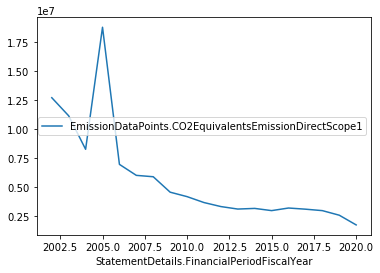

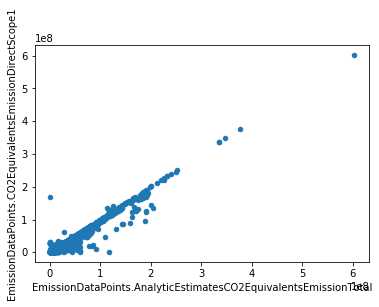

In [2]:
#drop rows with no data in either the year or target collumn
df2 = df1.dropna(subset=['EmissionDataPoints.CO2EquivalentsEmissionDirectScope1', 'StatementDetails.FinancialPeriodFiscalYear'])
#df2 = df2[(np.abs(stats.zscore(df2['EmissionDataPoints.CO2EquivalentsEmissionDirectScope1'])) < 3)]
#df2.loc[df2['EmissionDataPoints.CO2EquivalentsEmissionDirectScope1']!=df2['EmissionDataPoints.CO2EquivalentsEmissionDirectScope1'].max()]


#Make all data numeric
df2_numeric = df2.apply(pd.to_numeric, args=('coerce',))

#group data by year and calculate target mean for each year 
df2_grouped_by_year = df2_numeric.groupby('StatementDetails.FinancialPeriodFiscalYear').mean().apply(pd.to_numeric, args=('coerce',))

df2_grouped_by_year.reset_index().plot(x = 'StatementDetails.FinancialPeriodFiscalYear' ,y = 'EmissionDataPoints.CO2EquivalentsEmissionDirectScope1')

df2_numeric.plot.scatter(x='EmissionDataPoints.AnalyticEstimatesCO2EquivalentsEmissionTotal', y = 'EmissionDataPoints.CO2EquivalentsEmissionDirectScope1')

df2['StatementDetails.FinancialPeriodFiscalYear'].value_counts()

print(df2['EmissionDataPoints.CO2EquivalentsEmissionDirectScope1'].argmax())

In [3]:
#Keep only numeric values for correlation calculations
df_full = df2.apply(pd.to_numeric, args=('coerce',))
df_full2 = df_full.select_dtypes(['number'])

#calculate correlations
cor = df_full2.corr()
cor_target = abs(cor['EmissionDataPoints.CO2EquivalentsEmissionDirectScope1'])

#display Correlation values for features with a useable correlation
features = cor_target[cor_target > 0.5]
display(features)

EmissionDataPoints.AnalyticEstimatesCO2EquivalentsEmissionTotal    0.981030
EmissionDataPoints.CO2EquivalentsEmissionDirectScope1              1.000000
EmissionDataPoints.CO2EquivalentsEmissionTotal                     0.985258
EmissionDataPoints.FlaringGases                                    0.641745
EmissionDataPoints.VocEmissions                                    0.579600
Name: EmissionDataPoints.CO2EquivalentsEmissionDirectScope1, dtype: float64

In [4]:
#Remove the rows with null as given sector and print amount of sectors, and businesses per sector
df2_rename = df2.rename(columns={"GTAP sector": "sector"})
df2_sector_clean = df2_rename[df2_rename.sector != "Null"]
print(df2_sector_clean['sector'].nunique())
print(df2_sector_clean['sector'].value_counts())

#calculate mean of target per sector and print all of them
df2_grouped_by_sector = df2_sector_clean.groupby('sector').mean().apply(pd.to_numeric, args=('coerce',))
print("Mean of target by sector")
print(df2_grouped_by_sector['EmissionDataPoints.CO2EquivalentsEmissionDirectScope1'])

51
Financial services nec                        2498
Computer, electronic and optical products     1568
Trade                                         1335
Electricity                                   1243
Real estate activities                        1037
Construction                                   932
Insurance                                      847
Communication                                  801
Chemical products                              787
Business services nec                          776
Other Extraction                               685
Basic pharmaceutical products                  667
Machinery and equipment nec                    564
Petroleum, coal products                       485
Bovine cattle, sheep and goats, horses         478
Gas                                            417
Transport nec                                  379
Motor vehicles and parts                       350
Fishing                                        343
Mineral products nec        

In [5]:
from sklearn import linear_model

#Hernoemt de columns omdat de '.' in de namen voor problemen zorgt
df1 = df1.rename(columns={'EmissionDataPoints.CO2EquivalentsEmissionDirectScope1': 'scope', 'StatementDetails.FinancialPeriodFiscalYear': "year"})


#hele lompe manier van rijen verwijderen in 2005 die heel raar doen
df1 = df1.drop(df1[(df1['year'] == 2005) & (df1['scope'] > 100000000)].index)

#Verwijdert de NaN's
df1 = df1.dropna(subset=['scope', 'year']) 

#sorteert per jaar en neemt dan de gemiddelde van elk jaar. Zodat je dan één lijn krijgt
df1_means = df1.groupby('year').mean().reset_index()

#maakt array van de column
y = df1_means.scope.values
x = df1_means.year.values

#iets van stack-overflow zodat de dimensies kloppen voor de lineaire regressie.
#Als iets niet helemaal klopt in de resultaten zou het hiermee te maken kunnen 
#hebben, want ik snap niet precies wat hier gebeurt
length = len(df1_means) 
x = x.reshape(length, 1)   
y = y.reshape(length, 1)

#stukkie sklearn
reg = linear_model.LinearRegression()
reg = reg.fit(x,y)

#richtingscoëfficiënt
reg.coef_


array([[-462955.05784842]])

In [6]:
import matplotlib.pyplot as plt

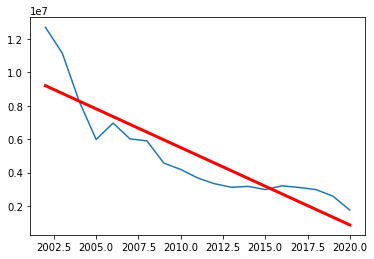

[-886807.66782755]


In [7]:
#plot de grafiek voor de lineaire regressie
plt.plot(x,y)
plt.plot(x, reg.predict(x), color='red', linewidth=3)
plt.show()


df1_means_indexed = df1.groupby('year').mean()

predicted = reg.predict(np.array(2020).reshape(-1, 1))[0]
actual = df1_means_indexed.scope[2020]
print(predicted- actual)

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [9]:
polyreg=make_pipeline(PolynomialFeatures(3),linear_model.LinearRegression())
polyreg.fit(x,y)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

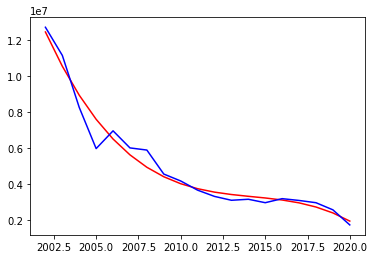

In [10]:
plt.plot(x,polyreg.predict(x),color="red")
plt.plot(x,y,color='blue')
plt.show()



In [11]:
#find best degree of polynomial
#Dit moet werken zonder 2020 meengenomen in de data (dus een aparte training en test set)


years = df1['year'].unique()
years.sort()

def best_poly_fit(x_array, y_array, actual_df, years, max_K=50):
    cost_best = 1000000000000
    costs = []
    i_list = list(range(max_K))
    for i in range(max_K):
        polyreg_i = make_pipeline(PolynomialFeatures(i),linear_model.LinearRegression())
        polyreg_i.fit(x_array, y_array)
        
        cost = 0
        for j in years:
            actual = actual_df.scope[j]
            predicted_poly = polyreg_i.predict(np.array(j).reshape(1, -1))
            cost += abs(predicted_poly - actual)
            
        
        
        
        costs.append(cost[0][0])
        #if(cost < cost_best):
            #cost_best = cost         
            #K_best = i
    
            
    return i_list, costs 

In [12]:
print(best_poly_fit(x, y, df1_means_indexed, years))

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], [43434280.94611615, 21151780.54658247, 10540935.523702752, 7143105.1093287915, 7141599.9862819165, 7137976.73384051, 7134316.265822932, 7130618.368972346, 7126883.140456721, 7123110.220534846, 7119299.652175471, 7115451.292800471, 7111564.915847346, 7107640.41882281, 7103677.75866656, 7099676.736205623, 7095637.334815547, 7091559.459815547, 7087442.662940547, 7083287.096534297, 7079092.741076991, 7074859.335803553, 7070586.626819178, 7066274.767444178, 7061923.574573085, 7057532.691754863, 7053102.365094706, 7048632.332868144, 7044122.353375956, 7039572.463239238, 7034982.494489238, 7030352.455915019, 7025682.038922831, 7020971.254743144, 7016220.037946269, 7011428.251325175, 7006595.653668925, 7001722.3314033, 6996808.0579658, 6991852.821149394, 6986856.531111762, 6981818.851912543, 6976739.9730

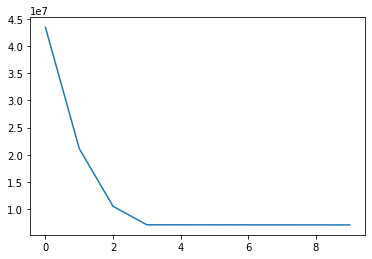

In [13]:
x2, y2 = best_poly_fit(x, y, df1_means_indexed, years, 10)
plt.plot(x2, y2)

#Dus beste polynomial is 3.

In [14]:
df1_sector = df1.rename(columns={"GTAP sector": "sector"})

#Function that can fit a polynomial prediction function over a certain sector given in the first argument
def sector_fit(sector, k):
    
    df_sector_only = df1_sector[df1_sector.sector == sector]
    df_sector_only.sort_values(['year'], ascending=[True], inplace=True)
    df_sector_means = df_sector_only.groupby('year').mean().reset_index()
    
    y_mean = df_sector_means.scope.values
    x_mean = df_sector_means.year.values
    
    y1 = df_sector_only.scope.values
    x1 = df_sector_only.year.values
    
    length = len(df_sector_only) 
    x1 = x1.reshape(length, 1)   
    y1 = y1.reshape(length, 1)
    
    polyreg=make_pipeline(PolynomialFeatures(k),linear_model.LinearRegression())
    polyreg.fit(x1,y1)
    
    plt.plot(x1,polyreg.predict(x1),color="red")
    plt.plot(x_mean,y_mean,color='blue')
    plt.show()
    
df1_sector['sector'].unique()
    

array(['Forestry', 'Construction', 'Null', 'Oil', 'Gas', 'Communication',
       'Manufactures nec', 'Beverages and tobacco products', 'Trade',
       'Motor vehicles and parts', 'Electricity', 'Fishing',
       'Water transport', 'Computer, electronic and optical products',
       'Financial services nec', 'Chemical products',
       'Warehousing and support activities', 'Metal products',
       'Insurance', 'Other Extraction', 'Water', 'None',
       'Basic pharmaceutical products', 'Sugar cane, sugar beet',
       'Real estate activities', 'Textiles', 'Electrical equipment',
       'Transport nec', 'Recreational and other services',
       'Accommodation, Food and service activities',
       'Business services nec', 'Animal products nec',
       'Vegetables, fruit, nuts', 'Machinery and equipment nec',
       'Rubber and plastic products', 'Education',
       'Petroleum, coal products', 'Food products nec',
       'Transport equipment nec', 'Mineral products nec',
       'Bovine cat

<ipython-input-14-ff247f1db5b8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sector_only.sort_values(['year'], ascending=[True], inplace=True)


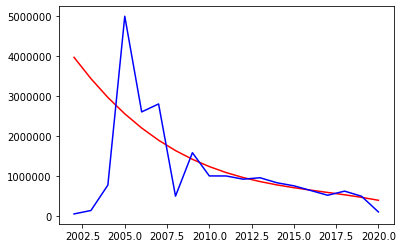

In [15]:
# fits a polynomial
sector_fit('Construction',3)

<ipython-input-16-4765887c46ff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data.sort_values(['year'], ascending=[True], inplace=True)


,organization_id,StatementDetails.FinancialPeriodEndDate,year,StatementDetails.FinancialPeriodIsIncomplete,StatementDetails.EsgOrAtdIndicator,EmissionDataPoints.AccidentalSpills,EmissionDataPoints.AnalyticCO2EstimationMethod,EmissionDataPoints.AnalyticEstimatesCO2EquivalentsEmissionTotal,EmissionDataPoints.BiodiversityImpactReduction,EmissionDataPoints.CarbonOffsetsCredits,...,ResourceUseDataPoints.TargetsEnergyEfficiency,ResourceUseDataPoints.TargetsWaterEfficiency,ResourceUseDataPoints.TotalRenewableEnergy,ResourceUseDataPoints.ToxicChemicalsReduction,ResourceUseDataPoints.WaterRecycled,ResourceUseDataPoints.WaterWithdrawalTotal,WorkforceDataPoints.AccidentsTotal,WorkforceDataPoints.AnnouncedLayOffs,GTAP country,GTAP sector
3883,6589,2002-12-31T00:00:00.000Z,2002,False,ESG,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,0.0,NaN,4.618202e+07,NaN,1860.0,United States of America,Chemical products
18656,4441,2002-03-30T00:00:00.000Z,2002,False,ESG,NaN,NaN,NaN,1.0,NaN,...,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,United Kingdom,Trade
85968,1891,2002-12-31T00:00:00.000Z,2002,False,ESG,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,0.0,NaN,7.750000e+06,NaN,2200.0,Germany,Chemical products
27836,746,2002-12-31T00:00:00.000Z,2002,False,ESG,14.681,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,Canada,Transport nec
48755,5879,2002-12-31T00:00:00.000Z,2002,False,ESG,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,1.0,NaN,1.283400e+07,NaN,75.0,United States of America,Basic pharmaceutical products
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3652,9235,2019-12-31T00:00:00.000Z,2019,False,ESG,NaN,Reported,188613.0,1.0,NaN,...,1.0,1.0,27000.0,0.0,NaN,6.294512e+06,NaN,NaN,United States of America,"Accommodation, Food and service activities"
49672,1052,2019-10-31T00:00:00.000Z,2019,False,ESG,NaN,Reported,5231.0,0.0,NaN,...,1.0,0.0,NaN,0.0,NaN,NaN,62.0,NaN,Canada,Financial services nec
68104,3251,2019-12-31T00:00:00.000Z,2019,False,ESG,0.000,Reported,540162.0,0.0,NaN,...,0.0,0.0,62190.0,0.0,NaN,1.150100e+07,NaN,NaN,Netherlands,"Vegetables, fruit, nuts"
68064,13890,2019-12-31T00:00:00.000Z,2019,False,ESG,0.000,Reported,1495567.0,1.0,NaN,...,0.0,0.0,NaN,0.0,NaN,1.325640e+03,NaN,NaN,United States of America,Transport nec


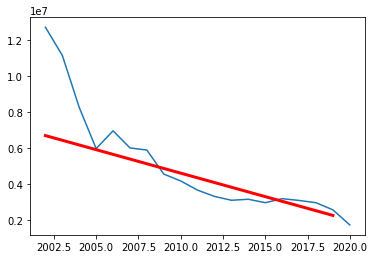

In [16]:
#gebruik alle data punten ipv mean
training_data = df1[df1.year != 2020]
training_data.sort_values(['year'], ascending=[True], inplace=True)
test_data = df1[df1.year == 2020]

display(training_data)

y1 = training_data.scope.values
x1 = training_data.year.values

length = len(training_data) 
x1 = x1.reshape(length, 1)   
y1 = y1.reshape(length, 1)

reg = linear_model.LinearRegression()
reg = reg.fit(x1,y1)

plt.plot(x,y)
plt.plot(x1, reg.predict(x1), color='red', linewidth=3)
plt.show()



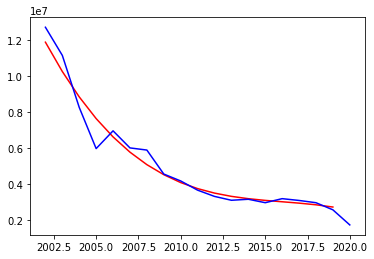

In [17]:
#polynomial regression met alle datapunten doet dit???
polyreg=make_pipeline(PolynomialFeatures(3),linear_model.LinearRegression())
polyreg.fit(x1,y1)

plt.plot(x1,polyreg.predict(x1),color="red")
plt.plot(x,y,color='blue')
plt.show()


In [46]:
df1_organization = df1.rename(columns={"organization_id": "id"})

#Function that can fit a polynomial prediction function over a certain organization given in the first argument
def organization_fit(id, k):
    
    df_id_only = df1_organization[df1_organization.id == id]
    df_id_only2 = df_id_only[['id', 'scope', 'year', 'GTAP sector']]
    sector = df_id_only['GTAP sector'].unique()[0]
    print(sector)
    df_sorted1 = df_id_only2.sort_values(['year'], ascending=[True], inplace=False)
    
    final_year = df_sorted1['year'].max()
    final_target = df_sorted1.loc[df_sorted1['year'] == final_year].iloc[0]['scope']
    added_bias = pd.DataFrame([[id, final_target, final_year + 1, sector]], columns=['id', 'scope', 'year', 'GTAP sector'])
    
    
    df_sorted1 = pd.concat([df_sorted1, added_bias])
    
    y1 = df_sorted1.scope.values
    x1 = df_sorted1.year.values
    
    length = len(df_sorted1) 
    x1 = x1.reshape(length, 1)   
    y1 = y1.reshape(length, 1)
    
    polyreg=make_pipeline(PolynomialFeatures(k),linear_model.LinearRegression())
    polyreg.fit(x1,y1)
    
    plt.plot(x1,polyreg.predict(x1),color="red")
    plt.plot(x1,y1,color='blue')
    plt.show()
    
    
def fit_validation(id, k):
    df_id_only = df1_organization[df1_organization.id == id]
    df_id_only2 = df_id_only[['id', 'scope', 'year', 'GTAP sector']]
    df_id_only3 = df_id_only2[df_id_only2['year'] > 2014]
    sector = df_id_only['GTAP sector'].unique()[0]
    print(sector)
    df_sorted1 = df_id_only3.sort_values(['year'], ascending=[True], inplace=False)
    
    final_year = df_sorted1['year'].max()
    train_df= df_sorted1.loc[df_sorted1['year']!= final_year]
    
    new_final_year = final_year -1
    if new_final_year not in train_df.year.values:
        return 0 
    final_target = train_df.loc[train_df['year'] == new_final_year].iloc[0]['scope']
    added_bias = pd.DataFrame([[id, final_target, final_year, sector]], columns=['id', 'scope', 'year', 'GTAP sector'])
    
    
    train_df = pd.concat([train_df, added_bias])
    
    y1 = train_df.scope.values
    x1 = train_df.year.values
    
    length = len(train_df) 
    x1 = x1.reshape(length, 1)   
    y1 = y1.reshape(length, 1)
    
    polyreg=make_pipeline(PolynomialFeatures(k),linear_model.LinearRegression())
    polyreg.fit(x1,y1)
    
    plt.plot(x1,polyreg.predict(x1),color="red")
    plt.plot(x1,y1,color='blue')
    plt.show()
    
    predicted_poly = polyreg.predict(np.array(final_year).reshape(1, -1))[0][0]
    actual = df_sorted1.loc[df_sorted1['year'] == final_year].iloc[0]['scope']
    
    print('actual:' + str(actual))
    print('predicted:'  + str(predicted_poly))
    
    error = abs((actual - predicted_poly)/actual)
    
    print('error:' + str(error))
    
    return error
    
    

In [47]:
def naive_validation(id):
    df_id_only = df1_organization[df1_organization.id == id]
    df_id_only2 = df_id_only[['id', 'scope', 'year', 'GTAP sector']]
    sector = df_id_only['GTAP sector'].unique()[0]
    print(sector)
    df_sorted1 = df_id_only2.sort_values(['year'], ascending=[True], inplace=False)
    
    final_year = df_sorted1['year'].max()
    train_df= df_sorted1.loc[df_sorted1['year']!= final_year]
    
    new_final_year = final_year -1
    if new_final_year not in train_df.year.values:
        return 0 
    final_target = train_df.loc[train_df['year'] == new_final_year].iloc[0]['scope']
    added_bias = pd.DataFrame([[id, final_target, final_year, sector]], columns=['id', 'scope', 'year', 'GTAP sector'])
    
    train_df = pd.concat([train_df, added_bias])
    
    predicted_naive = final_target
    actual = df_sorted1.loc[df_sorted1['year'] == final_year].iloc[0]['scope']
    
    print('actual:' + str(actual))
    print('predicted:'  + str(predicted_naive))
    
    error = abs((actual - predicted_naive)/actual)
    
    print('error:' + str(error))
    
    return error

Insurance


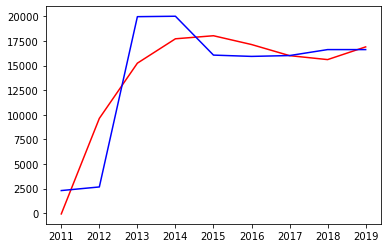

In [48]:
organization_fit(5,3)

Insurance


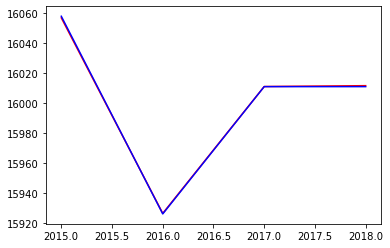

actual:16618.0
predicted:16011.640380859375
error:0.03648812246603833


0.03648812246603833

In [49]:
fit_validation(5,3)

Communication


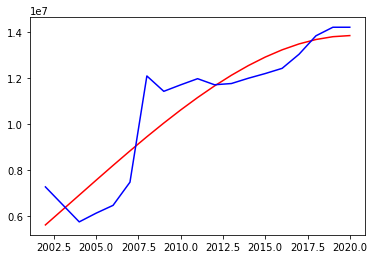

Manufactures nec


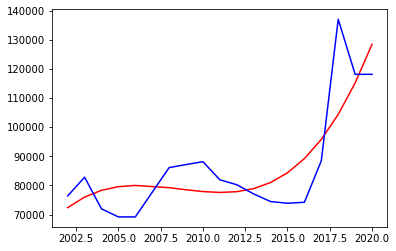

Null


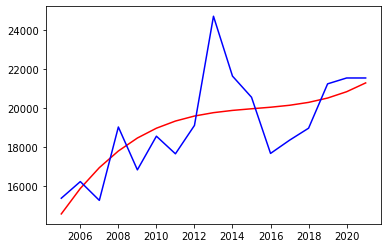

Other Extraction


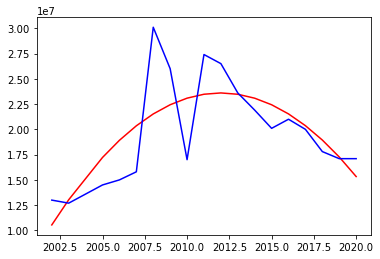

Other Extraction


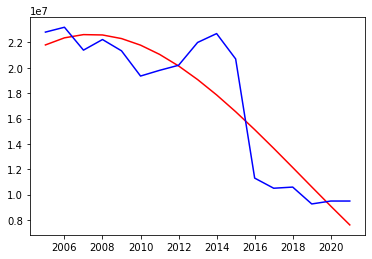

Transport nec


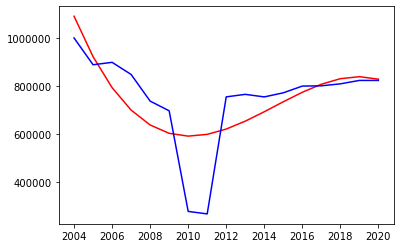

Computer, electronic and optical products


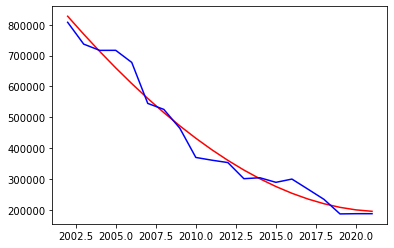

Communication


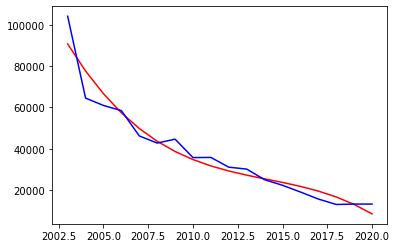

Chemical products


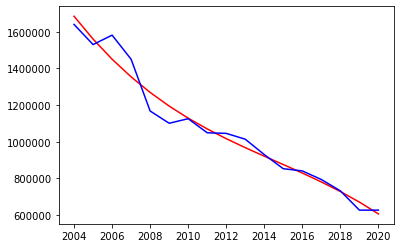

Chemical products


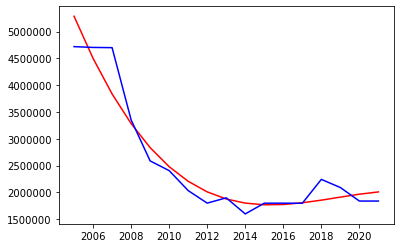

Chemical products


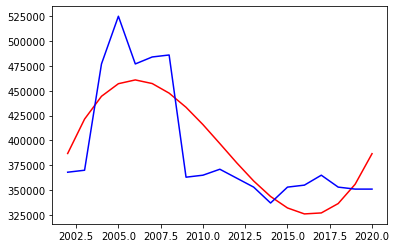

Other Extraction


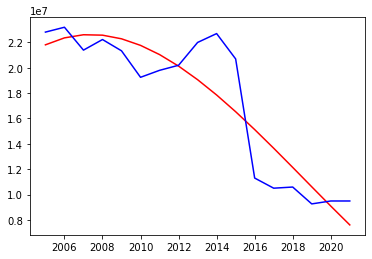

Metal products


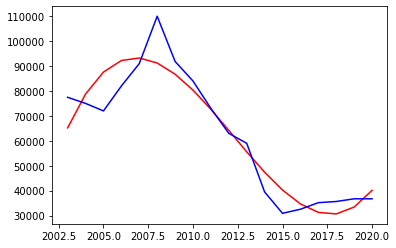

Null


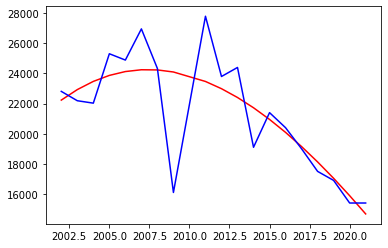

Electricity


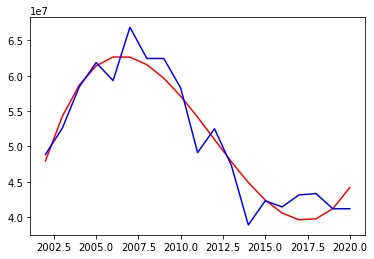

Null


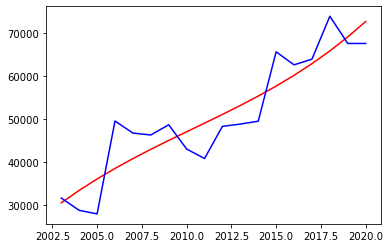

Financial services nec


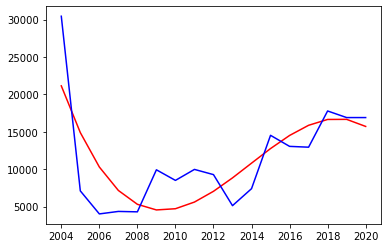

Electricity


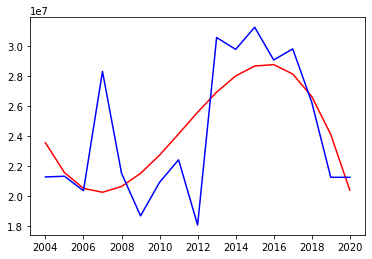

Basic pharmaceutical products


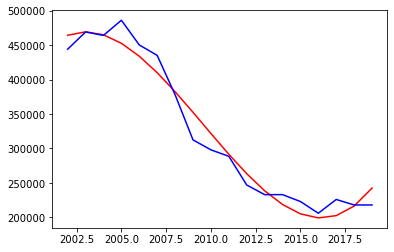

Bovine cattle, sheep and goats, horses


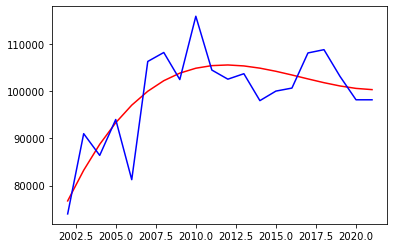

Manufactures nec


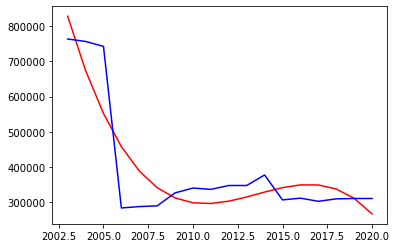

Basic pharmaceutical products


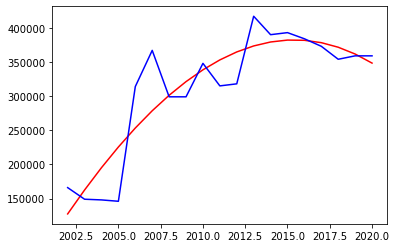

Null


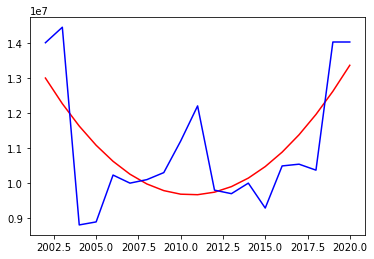

Computer, electronic and optical products


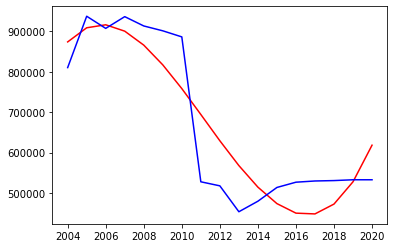

Computer, electronic and optical products


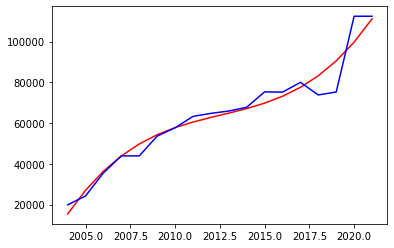

Real estate activities


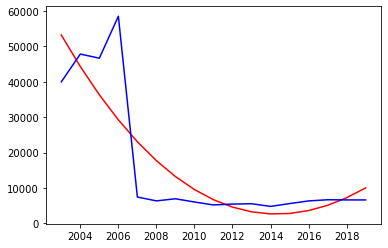

Bovine cattle, sheep and goats, horses


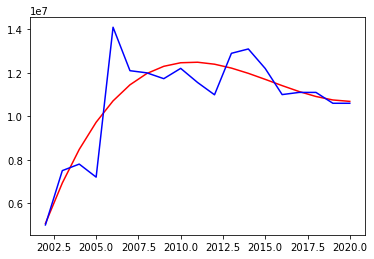

Null


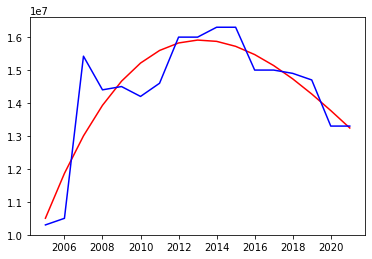

Null


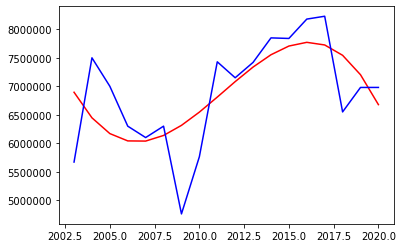

Null


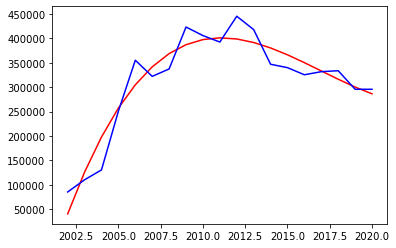

Electricity


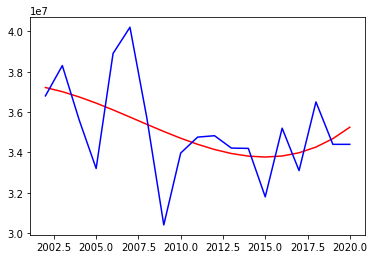

Computer, electronic and optical products


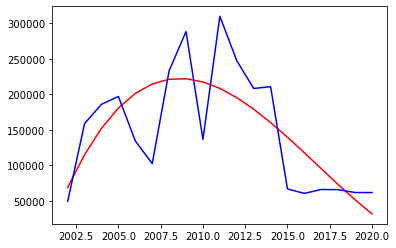

Null


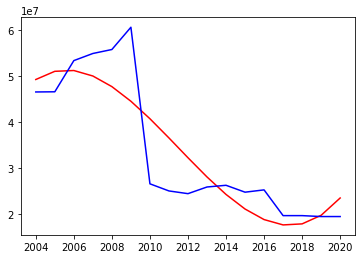

Rubber and plastic products


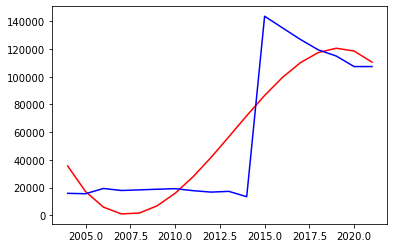

Petroleum, coal products


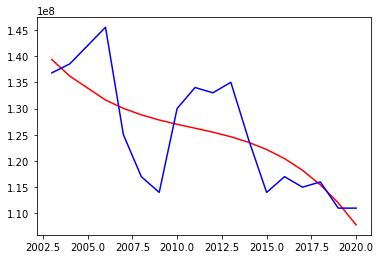

Petroleum, coal products


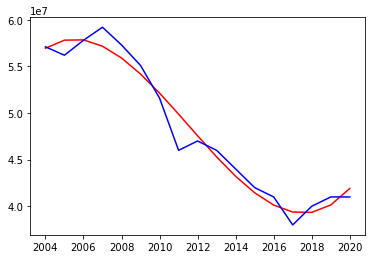

Bovine cattle, sheep and goats, horses


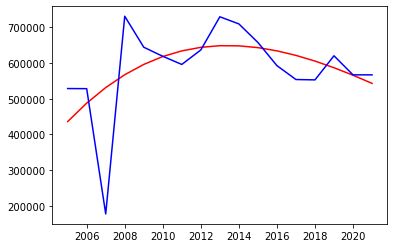

Beverages and tobacco products


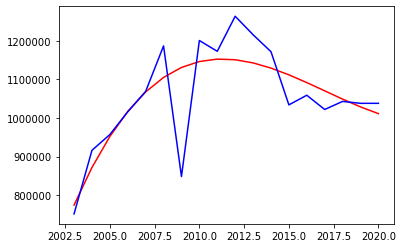

Ferrous metals


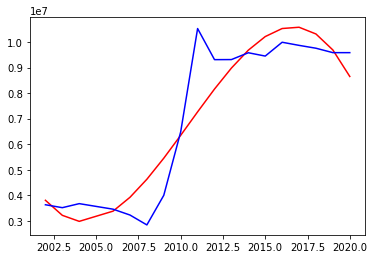

Other Extraction


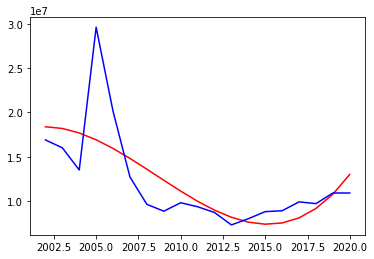

Computer, electronic and optical products


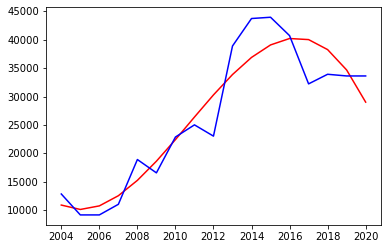

Basic pharmaceutical products


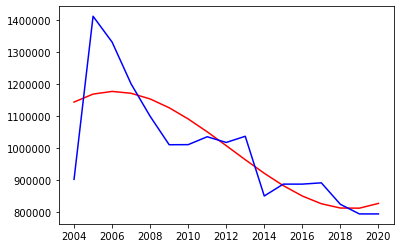

Bovine cattle, sheep and goats, horses


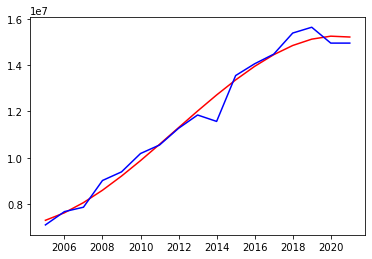

Computer, electronic and optical products


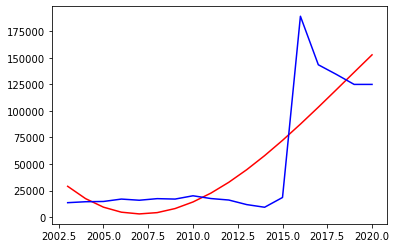

Petroleum, coal products


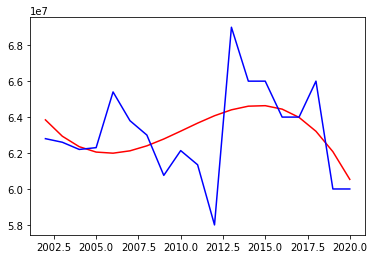

Bovine cattle, sheep and goats, horses


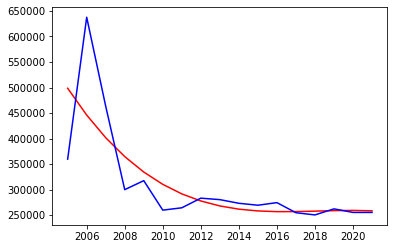

Electrical equipment


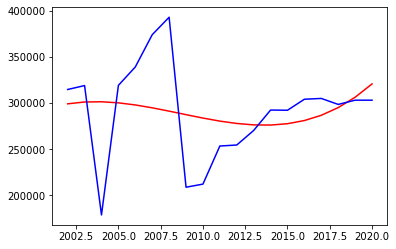

Construction


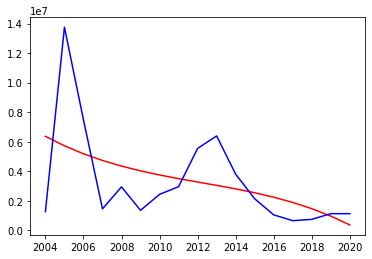

Basic pharmaceutical products


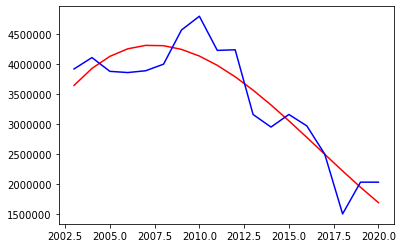

Ferrous metals


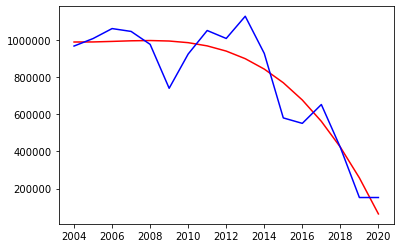

Basic pharmaceutical products


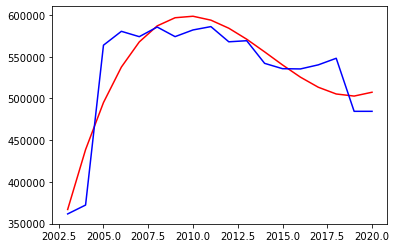

Water


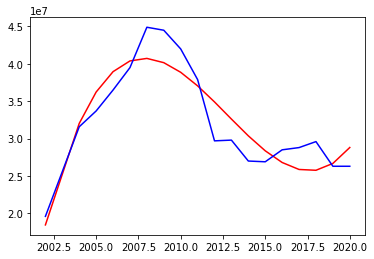

Null


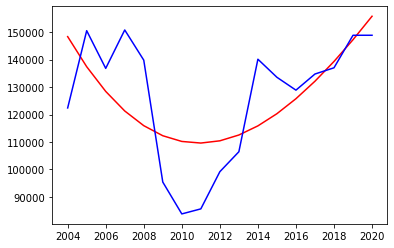

Null


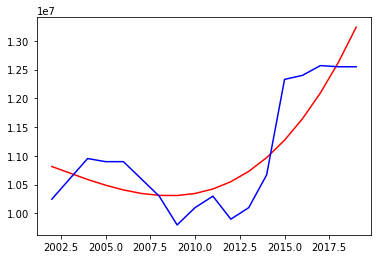

Oil


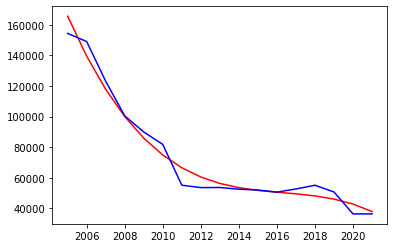

Fishing


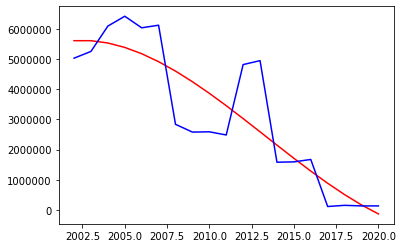

Real estate activities


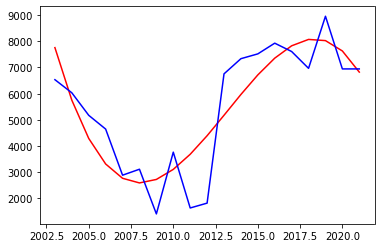

Accommodation, Food and service activities


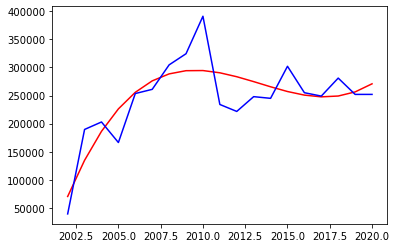

Financial services nec


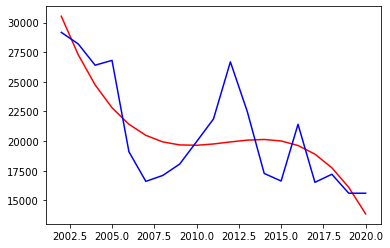

Machinery and equipment nec


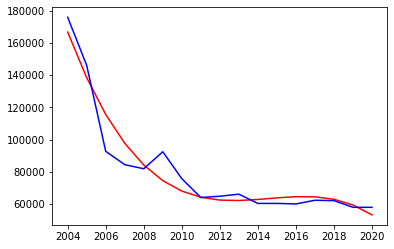

Motor vehicles and parts


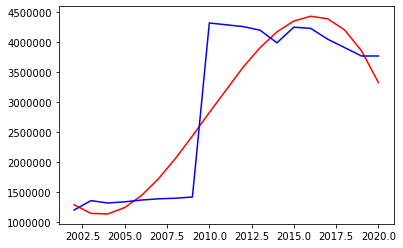

Trade


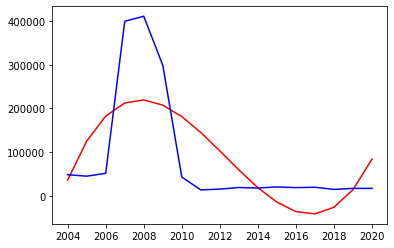

Null


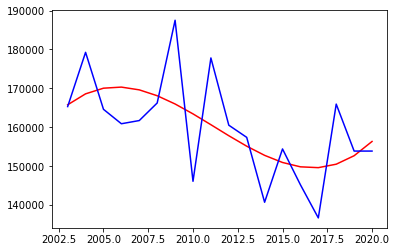

Machinery and equipment nec


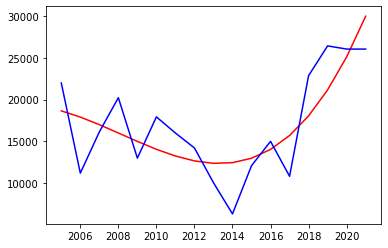

Null


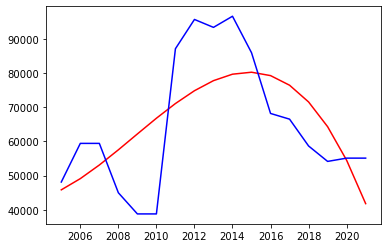

Computer, electronic and optical products


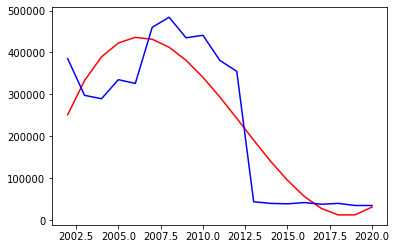

Financial services nec


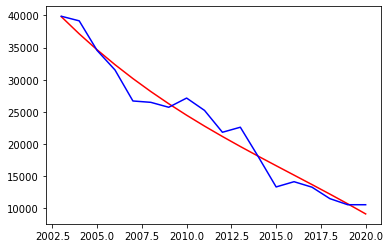

Real estate activities


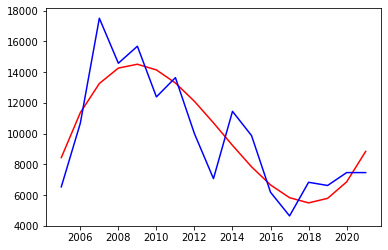

Insurance


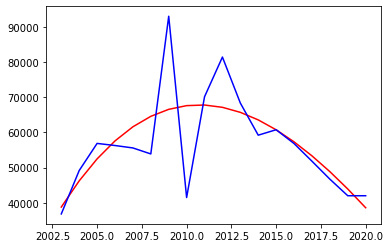

Transport nec


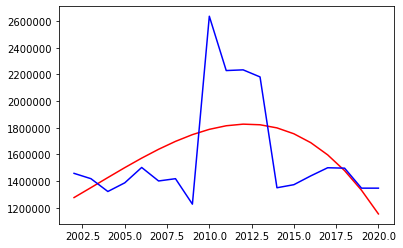

Null


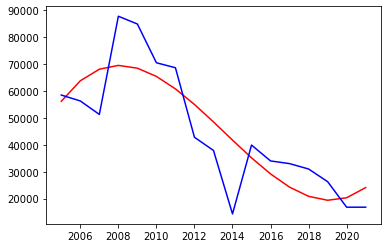

Machinery and equipment nec


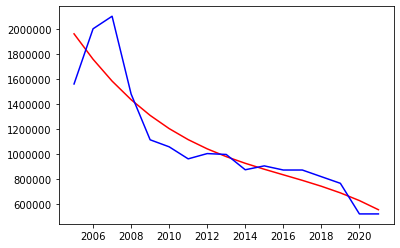

Motor vehicles and parts


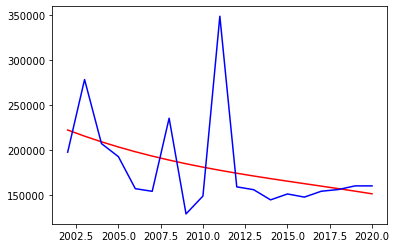

Machinery and equipment nec


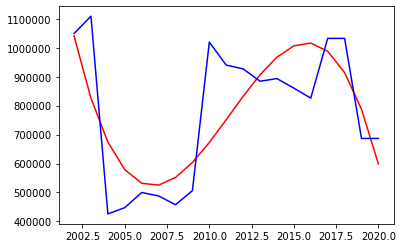

Petroleum, coal products


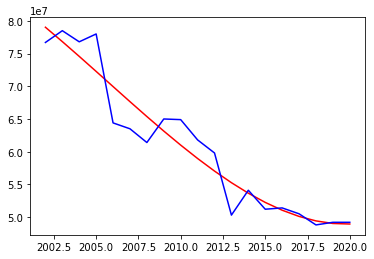

Computer, electronic and optical products


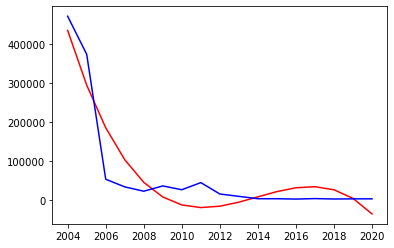

Null


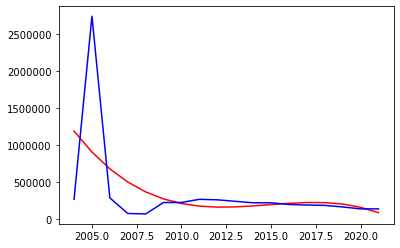

Basic pharmaceutical products


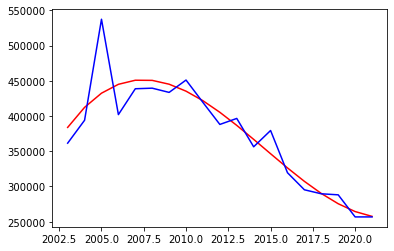

Electricity


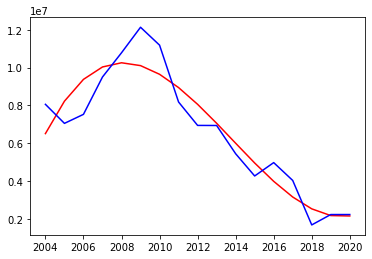

Transport nec


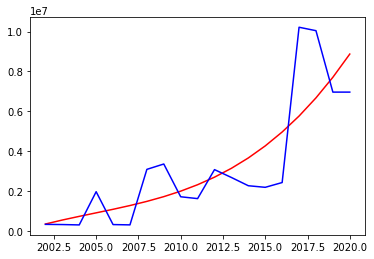

Chemical products


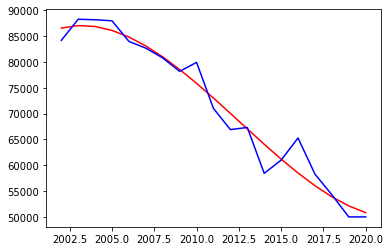

Motor vehicles and parts


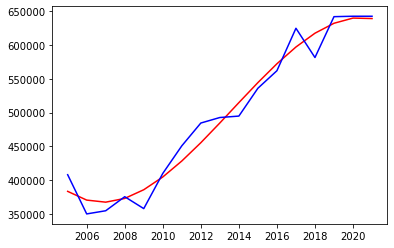

Petroleum, coal products


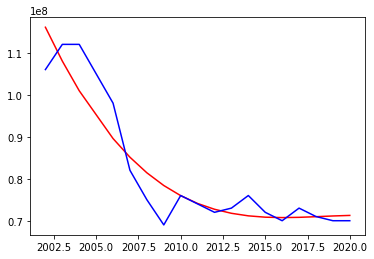

Bovine cattle, sheep and goats, horses


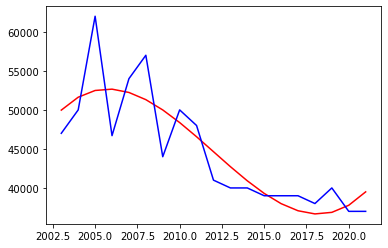

Null


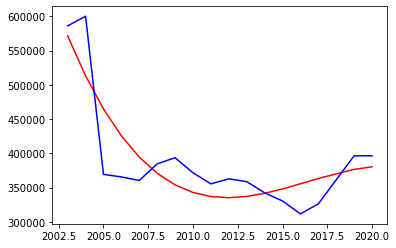

Null


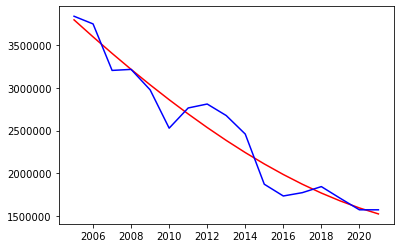

Trade


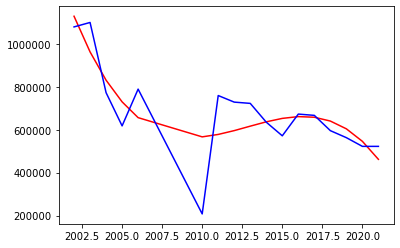

Chemical products


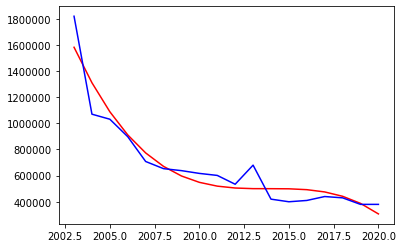

Insurance


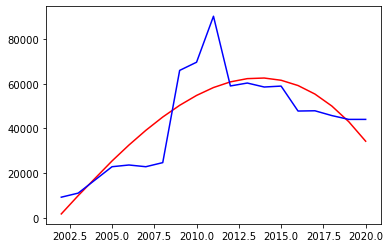

Communication


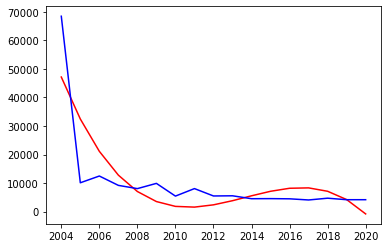

Financial services nec


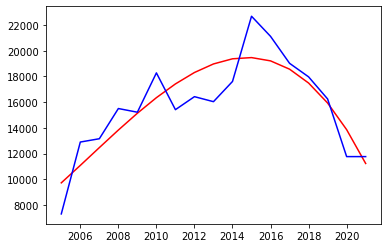

Air transport


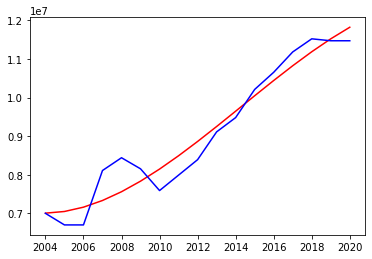

Basic pharmaceutical products


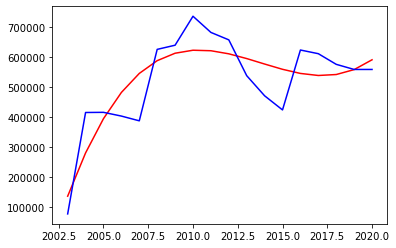

Null


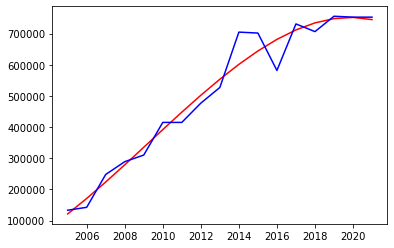

Financial services nec


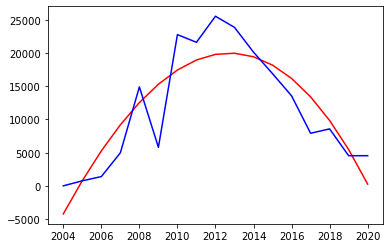

Real estate activities


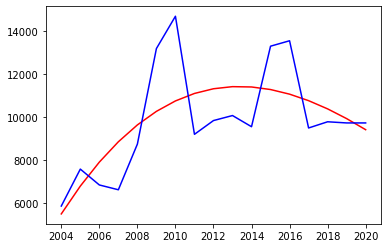

Basic pharmaceutical products


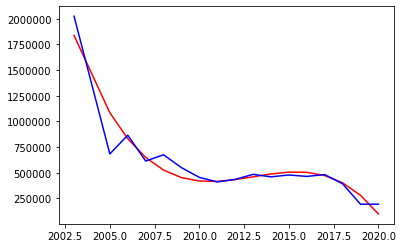

In [50]:
ids = df1_organization['id'].unique()
ids_good = []


for id in ids:
    df_id_only = df1_organization[df1_organization.id == id]
    if len(df_id_only['year'].unique()) > 15:
        ids_good.append(id)
        

for id in ids_good:
    organization_fit(id, 5)
    

    


Communication


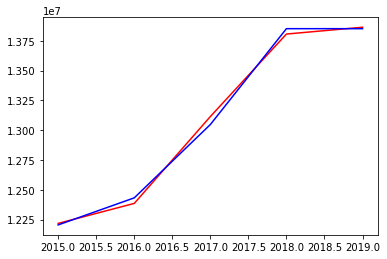

actual:14223000.0
predicted:13862996.75
error:0.02531134430148351
Manufactures nec


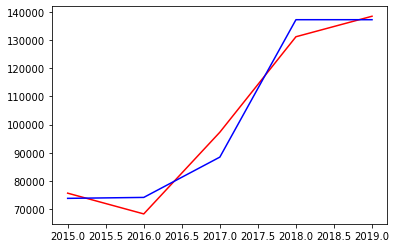

actual:118232.0
predicted:138408.1328125
error:0.17064866375008458
Null


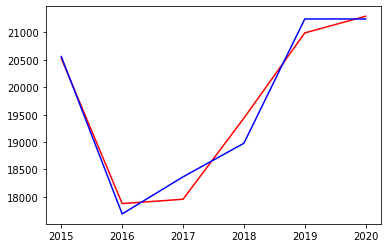

actual:21545.0
predicted:21294.818115234375
error:0.011612062416598979
Other Extraction


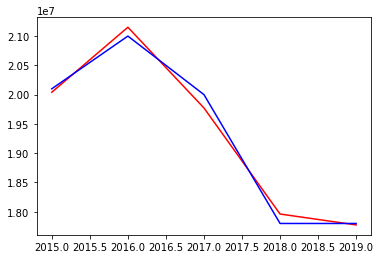

actual:17100000.0
predicted:17775258.5
error:0.039488801169590644
Other Extraction


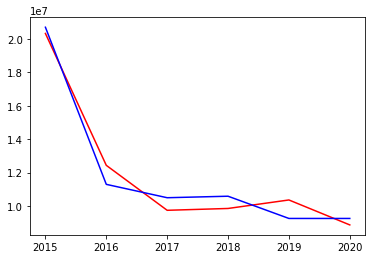

actual:9490000.0
predicted:8873084.0
error:0.06500695468914647
Transport nec


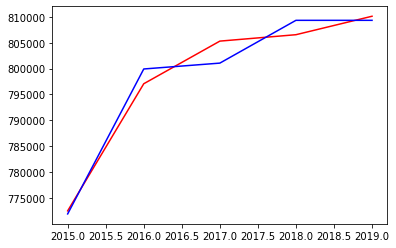

actual:823582.0
predicted:810119.44140625
error:0.01634634874699787
Computer, electronic and optical products


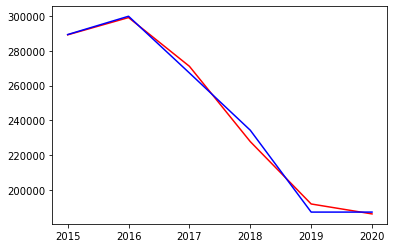

actual:187829.0
predicted:186071.4609375
error:0.009357123034781636
Communication


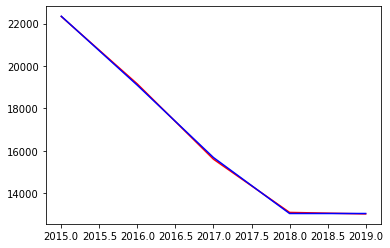

actual:13251.0
predicted:13037.4462890625
error:0.0161160448975549
Chemical products


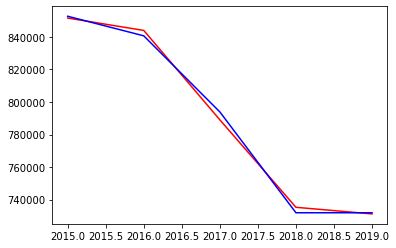

actual:626672.0
predicted:731216.03125
error:0.16682416200181274
Chemical products


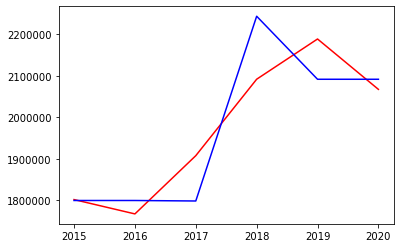

actual:1840000.0
predicted:2067670.875
error:0.12373417119565218
Chemical products


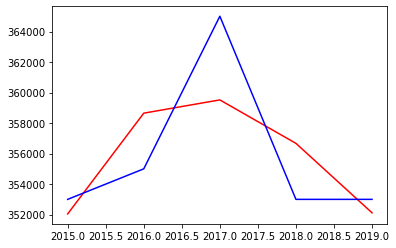

actual:351000.0
predicted:352118.53369140625
error:0.00318670567352208
Other Extraction


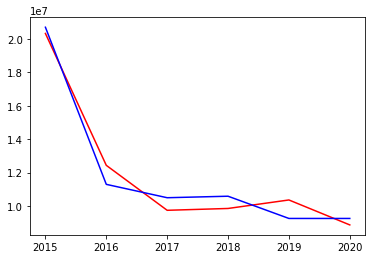

actual:9490000.0
predicted:8873084.0
error:0.06500695468914647
Metal products


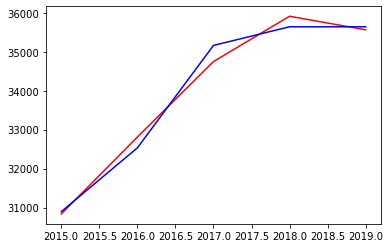

actual:36720.0
predicted:35561.89294433594
error:0.03153886317167926
Null


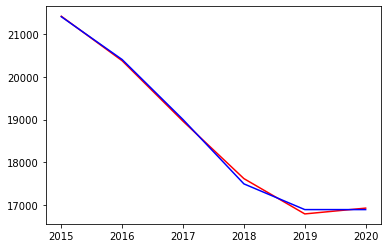

actual:15400.0
predicted:16934.498657226562
error:0.09964276994977679
Electricity


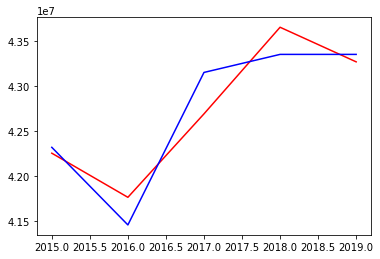

actual:41200000.0
predicted:43267371.5
error:0.05017891990291262
Null


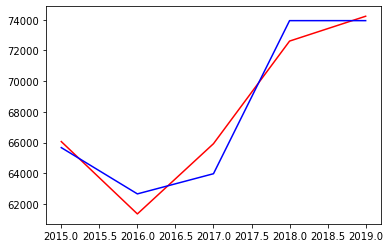

actual:67612.86
predicted:74225.97265625
error:0.09780850353394309
Financial services nec


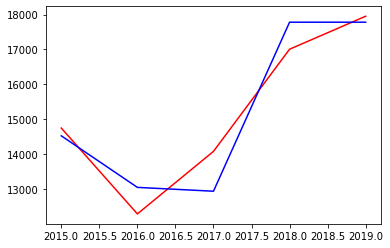

actual:16899.0
predicted:17951.53662109375
error:0.06228395887885378
Electricity


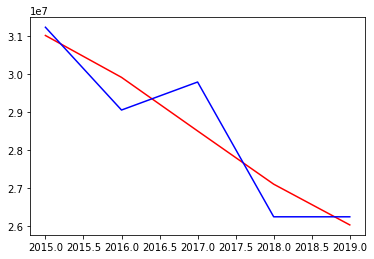

actual:21262000.0
predicted:26039632.625
error:0.22470287955037155
Basic pharmaceutical products


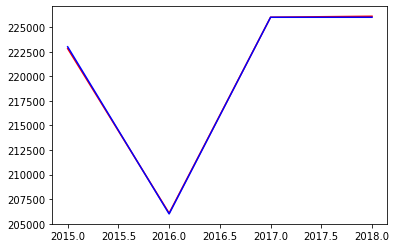

actual:218000.0
predicted:226105.25
error:0.03718004587155963
Bovine cattle, sheep and goats, horses


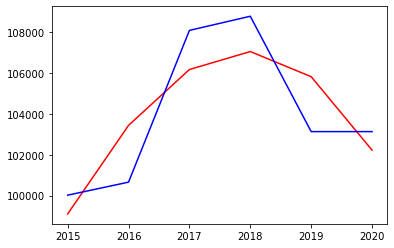

actual:98180.0
predicted:102232.13488769531
error:0.04127250853223989
Manufactures nec


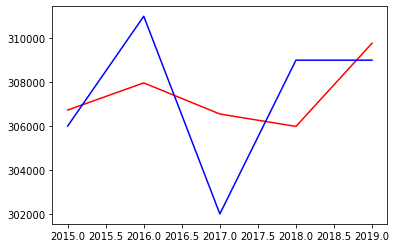

actual:310000.0
predicted:309773.2490234375
error:0.0007314547631048387
Basic pharmaceutical products


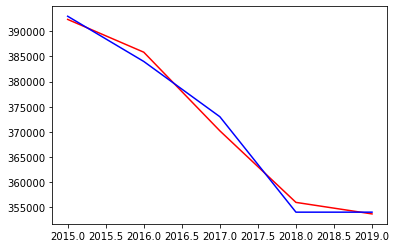

actual:359000.0
predicted:353650.166015625
error:0.014902044524721448
Null


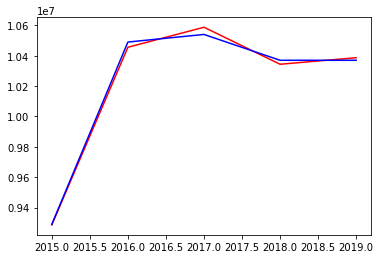

actual:14020000.0
predicted:10386875.625
error:0.2591386858059914
Computer, electronic and optical products


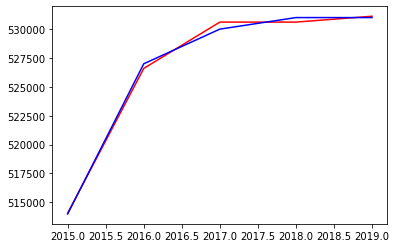

actual:533000.0
predicted:531115.322265625
error:0.003535980739915572
Computer, electronic and optical products


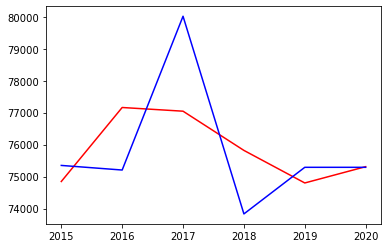

actual:112479.0
predicted:75310.04638671875
error:0.33045238322959175
Real estate activities


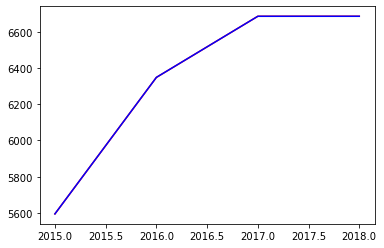

actual:6632.0
predicted:6685.251205444336
error:0.008029433872788892
Bovine cattle, sheep and goats, horses


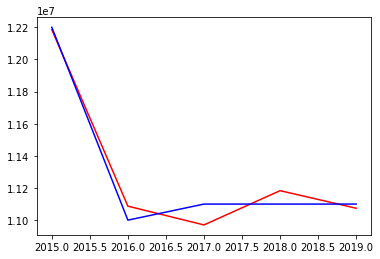

actual:10600000.0
predicted:11074127.75
error:0.04472903301886792
Null


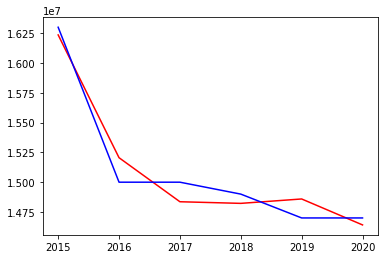

actual:13300000.0
predicted:14641520.6875
error:0.10086621710526315
Null


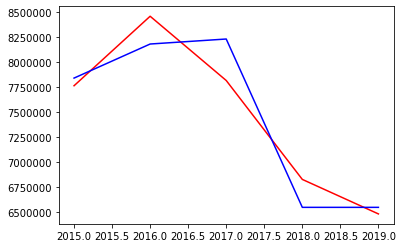

actual:6980000.0
predicted:6484453.75
error:0.07099516475644699
Null


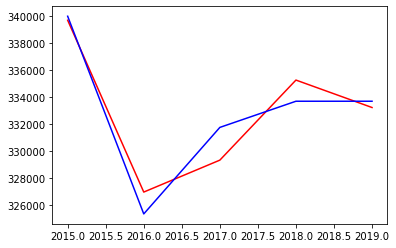

actual:295636.0
predicted:333226.56640625
error:0.12715151878069653
Electricity


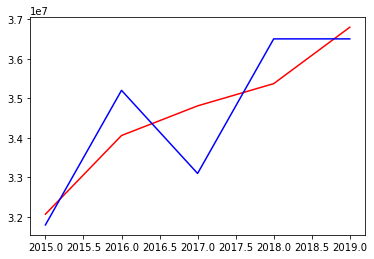

actual:34400000.0
predicted:36793895.0
error:0.06958997093023256
Computer, electronic and optical products


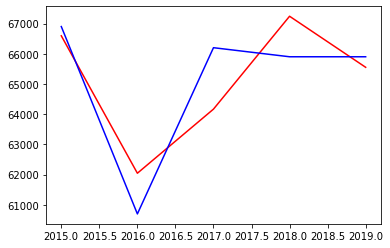

actual:61900.0
predicted:65551.5712890625
error:0.05899145862782714
Null


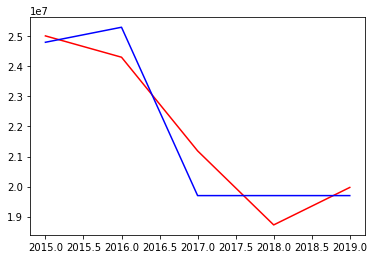

actual:19500000.0
predicted:19971460.0
error:0.024177435897435897
Rubber and plastic products


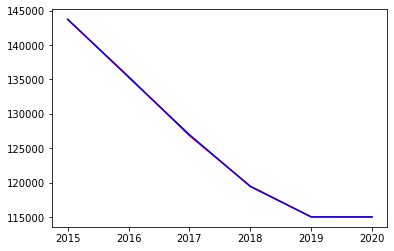

actual:107403.0
predicted:115026.03466796875
error:0.0709759938546293
Petroleum, coal products


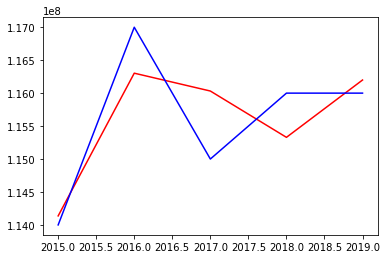

actual:111000000.0
predicted:116199268.5
error:0.04684025675675676
Petroleum, coal products


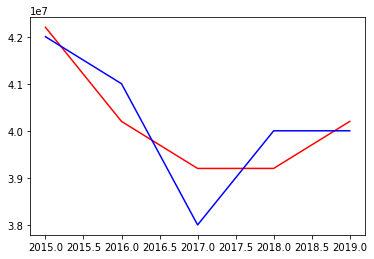

actual:41000000.0
predicted:40199613.892578125
error:0.019521612376143294
Bovine cattle, sheep and goats, horses


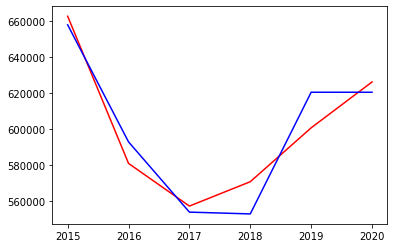

actual:567080.0
predicted:626280.109375
error:0.10439463457536856
Beverages and tobacco products


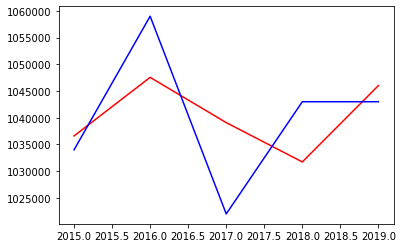

actual:1038000.0
predicted:1046018.8203125
error:0.007725260416666667
Ferrous metals


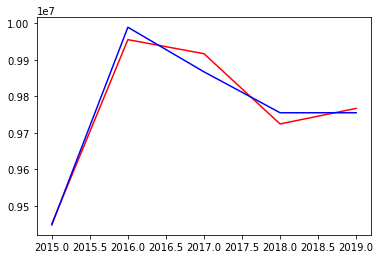

actual:9582000.0
predicted:9766916.5
error:0.019298319766228346
Other Extraction


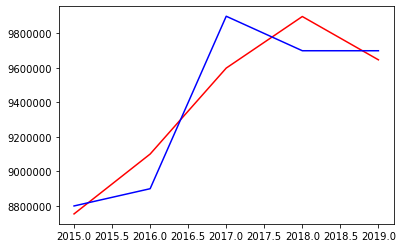

actual:10900000.0
predicted:9647350.5
error:0.11492197247706422
Computer, electronic and optical products


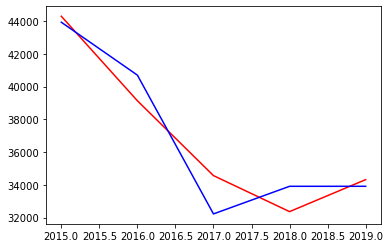

actual:33617.22
predicted:34319.6142578125
error:0.020893882891342558
Basic pharmaceutical products


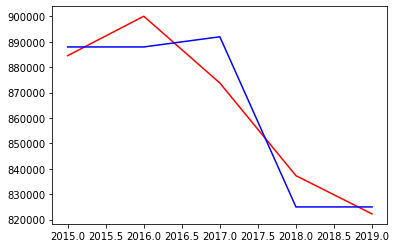

actual:795000.0
predicted:822246.7109375
error:0.03427259237421384
Bovine cattle, sheep and goats, horses


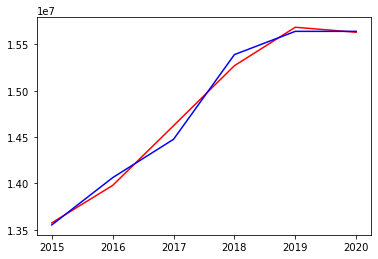

actual:14955000.0
predicted:15631112.875
error:0.04520982113005684
Computer, electronic and optical products


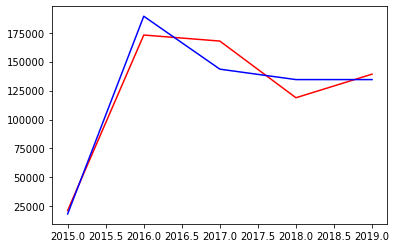

actual:125000.0
predicted:139191.0625
error:0.1135285
Petroleum, coal products


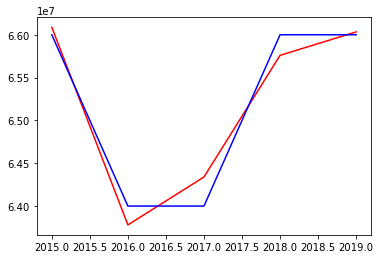

actual:60000000.0
predicted:66033381.5
error:0.10055635833333333
Bovine cattle, sheep and goats, horses


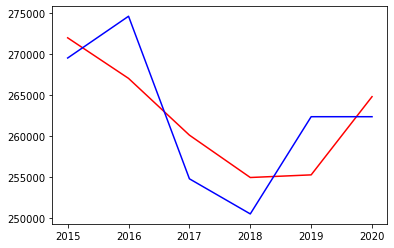

actual:255417.0
predicted:264818.9716796875
error:0.03681028153837646
Electrical equipment


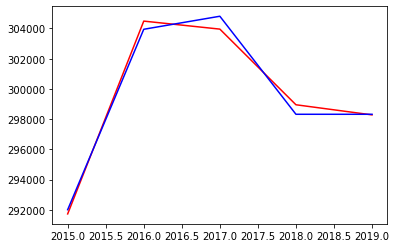

actual:302907.0
predicted:298282.541015625
error:0.015266926760936526
Construction


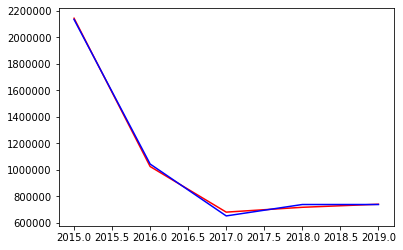

actual:1125206.0
predicted:740482.8125
error:0.34191355849506666
Basic pharmaceutical products


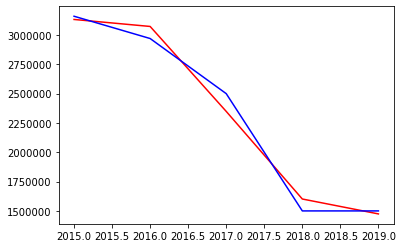

actual:2030000.0
predicted:1474403.5
error:0.2736928571428571
Ferrous metals


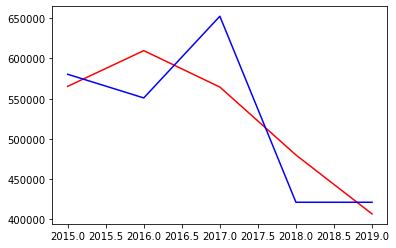

actual:151728.0
predicted:406925.5390625
error:1.681940967141859
Basic pharmaceutical products


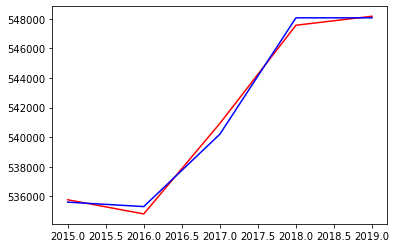

actual:484529.0
predicted:548180.380859375
error:0.13136753601822596
Water


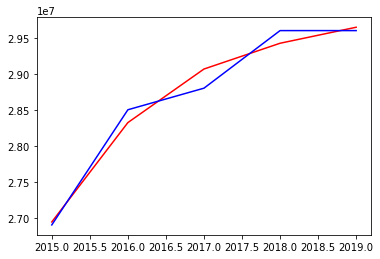

actual:26300000.0
predicted:29646629.125
error:0.12724825570342205
Null


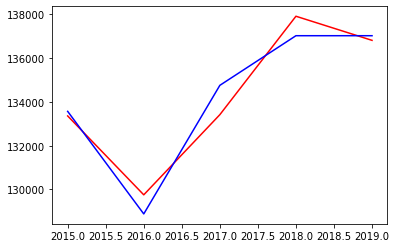

actual:148890.0
predicted:136817.767578125
error:0.0810815529711532
Null


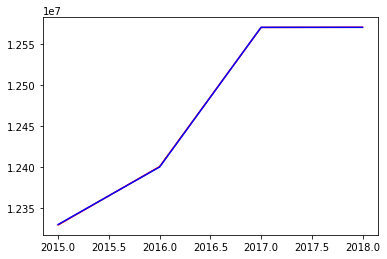

actual:12550000.0
predicted:12570120.6875
error:0.00160324203187251
Oil


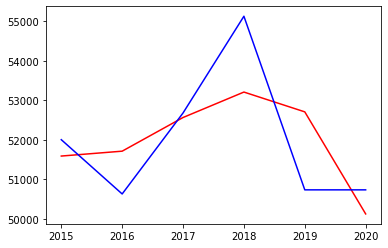

actual:36381.0
predicted:50122.248046875
error:0.37770396764451225
Fishing


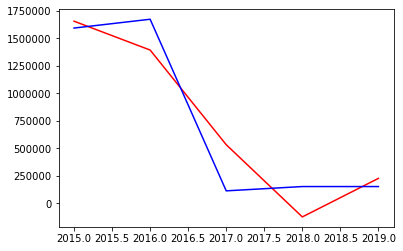

actual:134000.0
predicted:227174.75
error:0.6953339552238806
Real estate activities


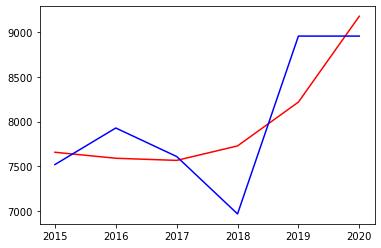

actual:6945.0
predicted:9177.920104980469
error:0.32151477393527267
Accommodation, Food and service activities


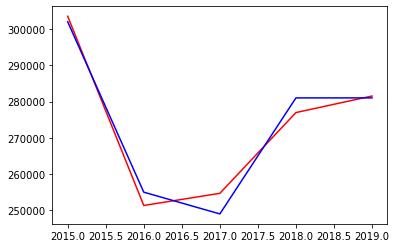

actual:252000.0
predicted:281518.578125
error:0.11713721478174603
Financial services nec


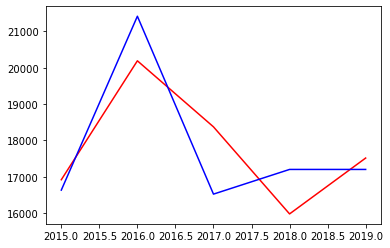

actual:15600.0
predicted:17513.8583984375
error:0.12268323066907051
Machinery and equipment nec


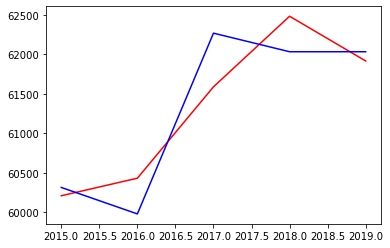

actual:57879.0
predicted:61917.375244140625
error:0.06977271971078673
Motor vehicles and parts


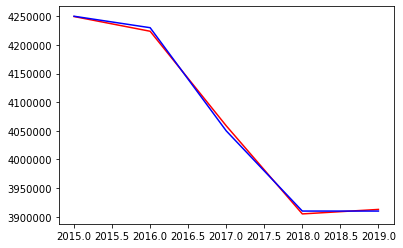

actual:3770000.0
predicted:3912860.875
error:0.03789413129973475
Trade


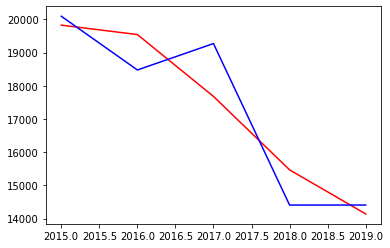

actual:16715.0
predicted:14138.58447265625
error:0.15413793163887227
Null


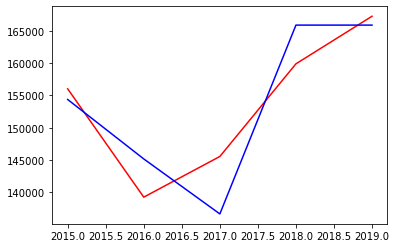

actual:153828.615
predicted:167295.3515625
error:0.08754376786464606
Machinery and equipment nec


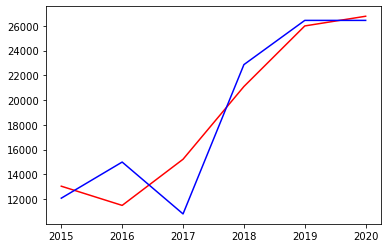

actual:26053.0
predicted:26771.98681640625
error:0.02759708349926112
Null


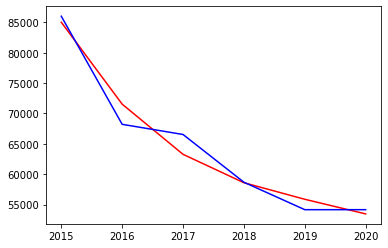

actual:55130.0
predicted:53473.1328125
error:0.03005382164883004
Computer, electronic and optical products


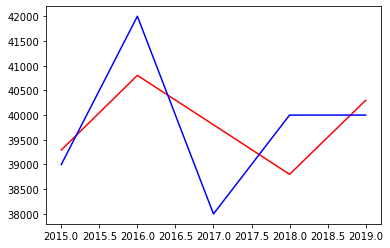

actual:35000.0
predicted:40298.521484375
error:0.151386328125
Financial services nec


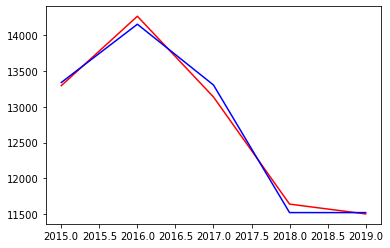

actual:10574.0
predicted:11503.55126953125
error:0.08790914219134197
Real estate activities


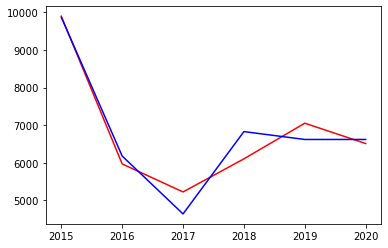

actual:7458.0
predicted:6511.144287109375
error:0.12695839539965473
Insurance


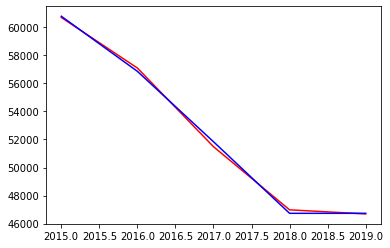

actual:42011.0
predicted:46691.08935546875
error:0.1114015223505451
Transport nec


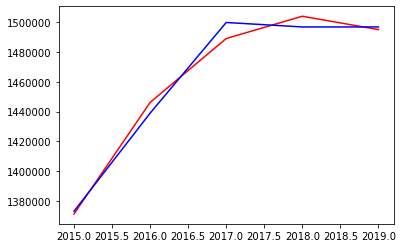

actual:1347000.0
predicted:1495220.703125
error:0.11003764151818857
Null


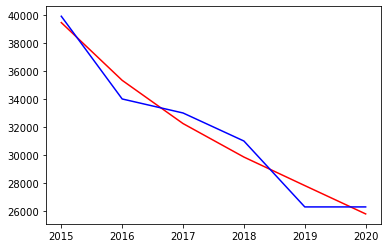

actual:16800.0
predicted:25800.720275878906
error:0.5357571592785063
Machinery and equipment nec


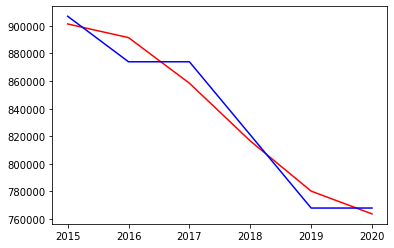

actual:524000.0
predicted:763739.0859375
error:0.45751733957538165
Motor vehicles and parts


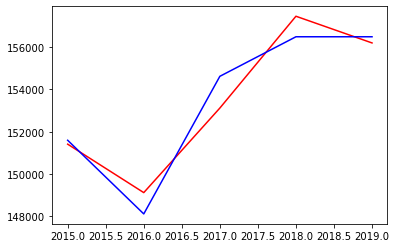

actual:160551.0
predicted:156196.9443359375
error:0.027119455276282924
Machinery and equipment nec


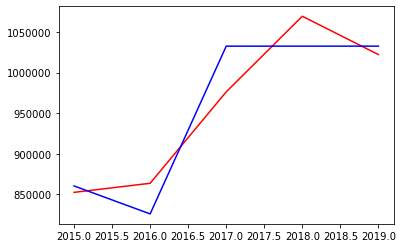

actual:686713.0
predicted:1022170.0
error:0.48849664998332637
Petroleum, coal products


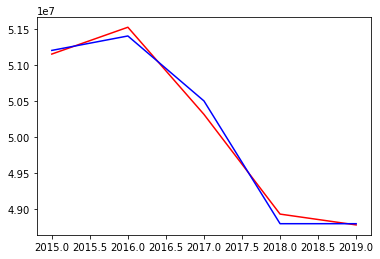

actual:49200000.0
predicted:48783121.75
error:0.008473135162601626
Computer, electronic and optical products


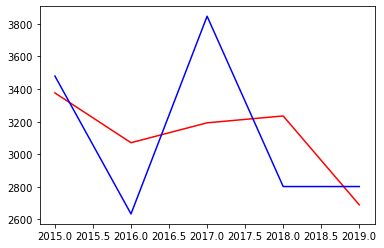

actual:3190.0
predicted:2689.6177978515625
error:0.1568596244979428
Null


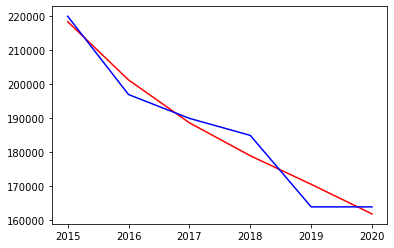

actual:138000.0
predicted:161933.09423828125
error:0.17342821911798006
Basic pharmaceutical products


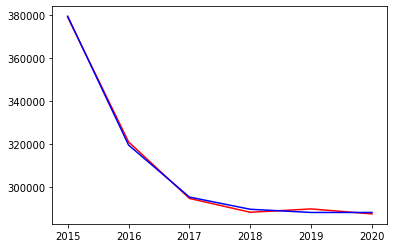

actual:256815.0
predicted:287479.908203125
error:0.11940466173364095
Electricity


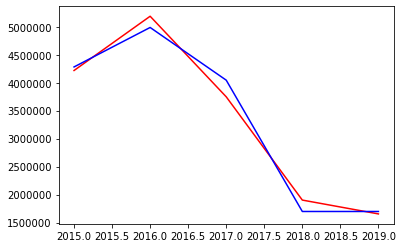

actual:2246167.0
predicted:1654888.0
error:0.26323910911343634
Transport nec


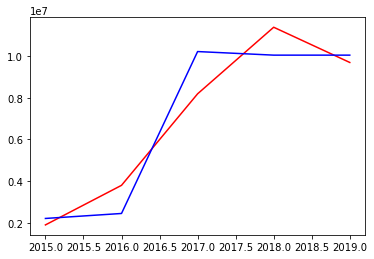

actual:6969000.0
predicted:9690680.0
error:0.39054096714019226
Chemical products


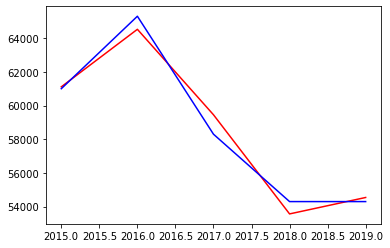

actual:50000.0
predicted:54543.369140625
error:0.0908673828125
Motor vehicles and parts


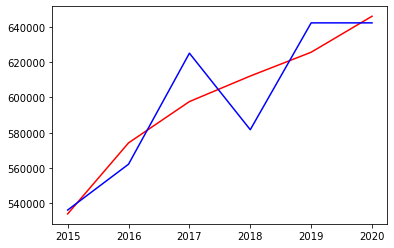

actual:642885.0
predicted:646013.908203125
error:0.004866979635743562
Petroleum, coal products


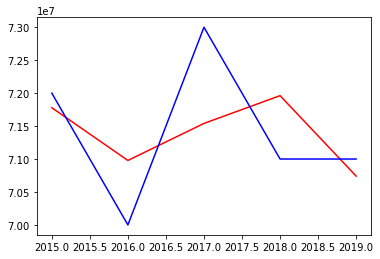

actual:70000000.0
predicted:70740547.25
error:0.010579246428571429
Bovine cattle, sheep and goats, horses


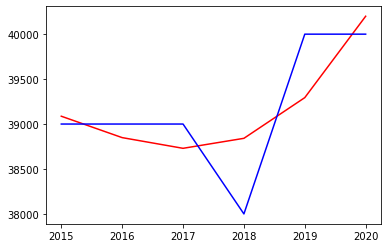

actual:37000.0
predicted:40199.35043334961
error:0.08646893063107053
Null
Null


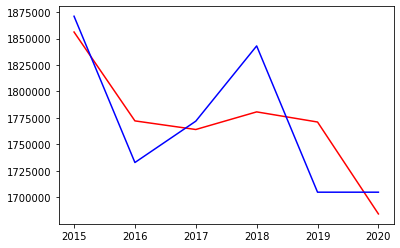

actual:1571000.0
predicted:1684497.4765625
error:0.07224537018618714
Trade


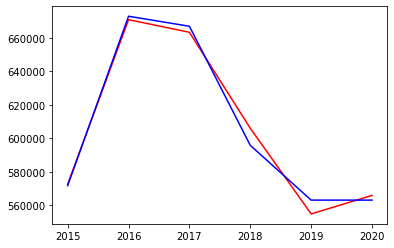

actual:522433.0
predicted:565824.6875
error:0.08305694222991274
Chemical products


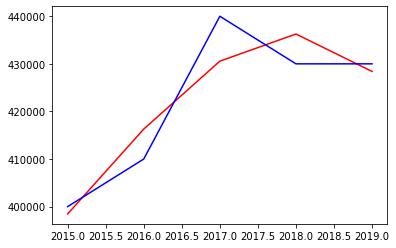

actual:380000.0
predicted:428407.1865234375
error:0.12738733295641447
Insurance


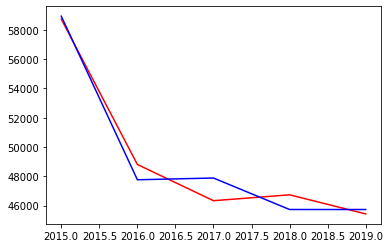

actual:44023.0
predicted:45428.87890625
error:0.03193509997614883
Communication


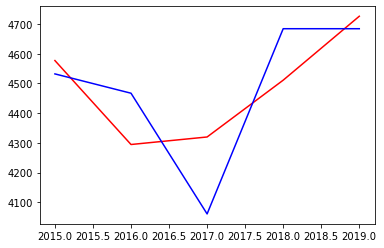

actual:4156.0
predicted:4725.946685791016
error:0.13713827858301628
Financial services nec


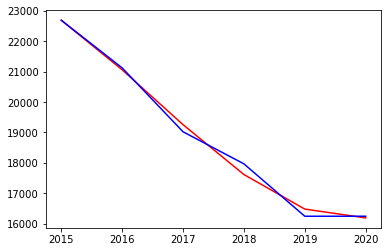

actual:11762.0
predicted:16193.737854003906
error:0.3767843779972714
Air transport


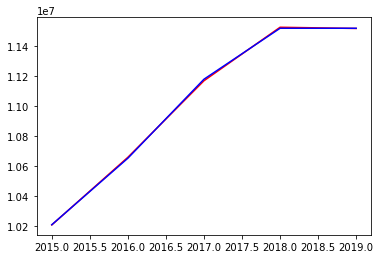

actual:11470000.0
predicted:11518562.3125
error:0.004233854620749782
Basic pharmaceutical products


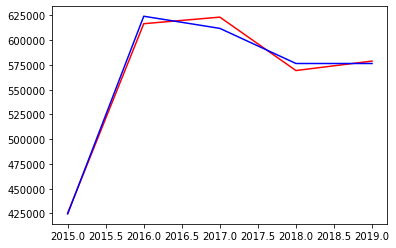

actual:559421.0
predicted:578921.71875
error:0.03485875351479476
Null


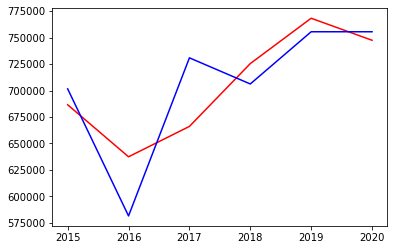

actual:752552.0
predicted:747448.46875
error:0.006781632697806929
Financial services nec


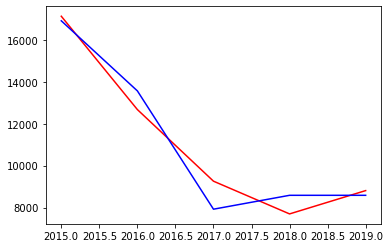

actual:4542.0
predicted:8808.47314453125
error:0.9393379886682629
Real estate activities


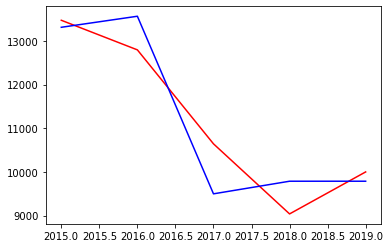

actual:9732.0
predicted:9999.10546875
error:0.027446102419852035
Basic pharmaceutical products


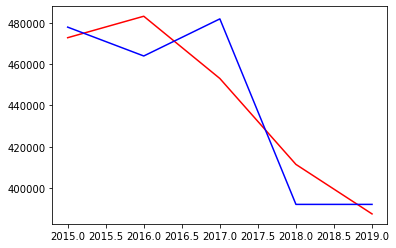

actual:193000.0
predicted:387377.140625
error:1.0071354436528497
percentage error: 14.588276923874183%


In [51]:
errors = []

def mean(list):
    return sum(list) / len(list)
    
    
    
for id in ids_good:
    errors.append(fit_validation(id, 3))
    
accuracy = mean(errors) * 100
print('percentage error: ' + str(accuracy) + '%')
    
    
    

In [24]:
print(errors)

[0.06777398541315123, 0.15007485923299899, 0.05357579363833782, 0.05875431606359649, 0.25761991446588517, 0.014496759894961886, 0.09927352143995295, 0.3609085526342941, 0.14615770788424307, 0.2513465225883152, 0.10802016420717593, 0.2580039058383825, 0.0245247369238494, 0.04864951920199704, 0.09622453580097087, 0.15222154556207598, 0.05069110765845982, 0.24641276837785722, 0.12166202426175458, 0.07237730385645705, 0.13220768649193548, 0.027329896549660514, 0.2995564227442939, 0.1489665440314259, 0.33055632431873666, 0.6161087344437658, 0.0499502727004717, 0.09930313733552631, 0.04649481778295129, 0.06447516930395401, 0.0669124370912064, 0.5620420401084789, 0.22837425, 0.17807916285508785, 0.009871322353603603, 0.014499322408536585, 0.016890978579411194, 0.030397919112776974, 0.06574720830724275, 0.0938123623853211, 0.09974648022998893, 0.08836517909787736, 0.0675865906312688, 0.3495769677734375, 0.10298638370768229, 0.04587378944514632, 0.05337081168825642, 1.049127573639849, 0.3642233

In [27]:
for id in ids_good:
    errors.append(naive_validation(id))
    
accuracy = mean(errors) * 100
print('percentage error: ' + str(accuracy) + '%')

Communication
actual:14223000.0
predicted:13851000.0
error:0.026154819658299938
Manufactures nec
actual:118232.0
predicted:137183.0
error:0.16028655524731036
Null
actual:21545.0
predicted:21245.0
error:0.013924344395451382
Other Extraction
actual:17100000.0
predicted:17800000.0
error:0.04093567251461988
Other Extraction
actual:9490000.0
predicted:9260000.0
error:0.02423603793466807
Transport nec
actual:823582.0
predicted:809330.0
error:0.017304894958850486
Computer, electronic and optical products
actual:187829.0
predicted:187123.0
error:0.0037587380010541504
Communication
actual:13251.0
predicted:13057.0
error:0.014640404497773754
Chemical products
actual:626672.0
predicted:731927.0
error:0.16795867694743025
Chemical products
actual:1840000.0
predicted:2092000.0
error:0.13695652173913042
Chemical products
actual:351000.0
predicted:353000.0
error:0.005698005698005698
Other Extraction
actual:9490000.0
predicted:9260000.0
error:0.02423603793466807
Metal products
actual:36720.0
predicted: